Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Landyn Francis"
COLLABORATORS = ""

---

<a href="https://colab.research.google.com/github/wecacuee/ECE490-Neural-Networks/blob/master/notebooks/05-mlp/microtorch.ipynb" target="_parent">
   Open In Colab
</a>

Adapted from: [UDL Book CM20315_Shallow.ipynb](https://colab.research.google.com/github/udlbook/udlbook/blob/main/CM20315_Shallow.ipynb)

# Homework 5: Multi Layer Perceptrons

The purpose of this practical is to gain some familiarity with shallow neural networks.  It explores using different numbers of inputs and outputs, hidden units and activation functions.


In [2]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

Let's first construct the shallow neural network with one input, three hidden units, and one output described in section 3.1 of the book.

In [3]:
# Define the Rectified Linear Unit (ReLU) function
# 5 marks
def ReLU(preactivation):
  # TODO write code to implement the ReLU and compute the activation at the 
  # hidden unit from the preactivation
  # This should work on every element of the ndarray "preactivation" at once
  # One way to do this is with the ndarray "clip" function
  # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.clip.html
  # Another way to do this is with the "np.maximum" function
  # https://numpy.org/doc/stable/reference/generated/numpy.maximum.html
  # YOUR CODE HERE
  activation = preactivation.clip(0)
  return activation

<function matplotlib.pyplot.show(close=None, block=None)>

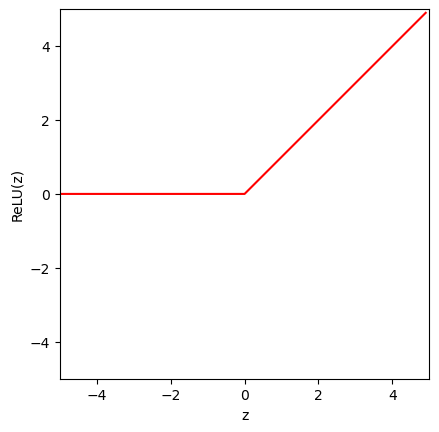

In [4]:
# Make an array of inputs
z = np.arange(-5,5,0.1)
RelU_z = ReLU(z)

# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU(z)')
ax.set_aspect('equal')
plt.show

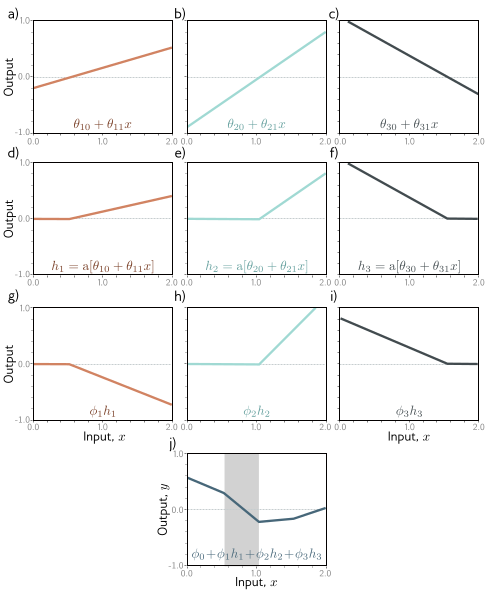

#### Define a shallow neural network with, one input, one output, and three hidden units
$$\Theta_1 = \begin{bmatrix} \theta_{11} \\ \theta_{21} \\ \theta_{31} \end{bmatrix} $$
$$\Theta_0 = \begin{bmatrix} \theta_{10} \\ \theta_{20} \\ \theta_{30} \end{bmatrix} $$
$$\text{pre} = \Theta_0 + \Theta_1 x$$
$$\text{act} = \text{activation_function}(\text{pre})$$
$$\Phi = \begin{bmatrix} \phi_{1} \\ \theta_{2} \\ \theta_{3} \end{bmatrix} $$
$$\text{w_act} = \Phi \odot \text{act}$$
$$ \text{y} = \phi_0 + \Phi^\top \text{act}$$

In [5]:
# Define a shallow neural network with, one input, one output, and three hidden units
# (10 marks)
def shallow_1_1_3(x, activation_fn, phi_0, phi_vec, theta_1, theta_0):
  """
  Inputs:
      x is a batch of scalars. A numpy array with multiple values of size say n.
      activation_fn is numpy function that takes one input and returns one output example, ReLU
      phi_0 is a scalar
      phi_vec is a numpy array of shape (3,)  [phi_1, phi_2, phi_3]
      theta_1 is a numpy array of shape (3,)  [theta_11, theta_21, theta_31]
      theta_0 is a numpy array of shape (3,)  [theta_10, theta_20, theta_30]
  Returns:
      y, pre, act, w_act
      
      y is the scalar output of the neural network. For input x of size n, the output must be of size n.
      
      pre stands for for pre-activation values. These are linear functions of x. pre should be a
          numpy array of shape  (n, 3), and each value should be computed from x and theta_1 and theta_0
      
      act stands for activation values. These archived by applying the activation function
          to the pre. 
        
      w_act stands for with weighted activation. Multiple act with phi_vec element-wise to 
          get numpy array of shape (n, 3).
  """
  # TODO Replace the lines below to compute the three initial lines 
  # (figure a-c above) from the theta parameters.  These are the preactivations
  # pre = ?? 
  # pre must of shape (n, 3) if x is of shape n. 
  # Hint: introduce an additional dimension to x to use broadcasting
  pre = x[:,None] * theta_1 + theta_0
  # Pass these through the ReLU function to compute the activations as in 
  # figure 3.3 d-f
  act = activation_fn(pre)
  # TODO Replace the code below to weight the activations using phi1, phi2 and phi3
  # To create the y-axis equivalent of figure g-i 
  # w_act = ??
  # YOUR CODE HERE
  w_act = phi_vec * act
  # TODO Replace the code below to combing the weighted activations and add 
  # phi_0 to create the output as in figure j
  y = phi_0 + w_act.sum(axis=-1)
  # Return everything we have calculated
  return y, pre, act, w_act

In [6]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3 
def plot_neural(x, y, pre, act, w_act, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre[:, 0],'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre[:, 1],'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre[:, 2],'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act[:, 0],'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act[:, 1],'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act[:, 2],'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act[:, 0],'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act[:, 1],'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act[:, 2],'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
  plt.show()

Now let's run the neural network.  If your code is correct, then the final output should look like this:
Correct nn output.svg

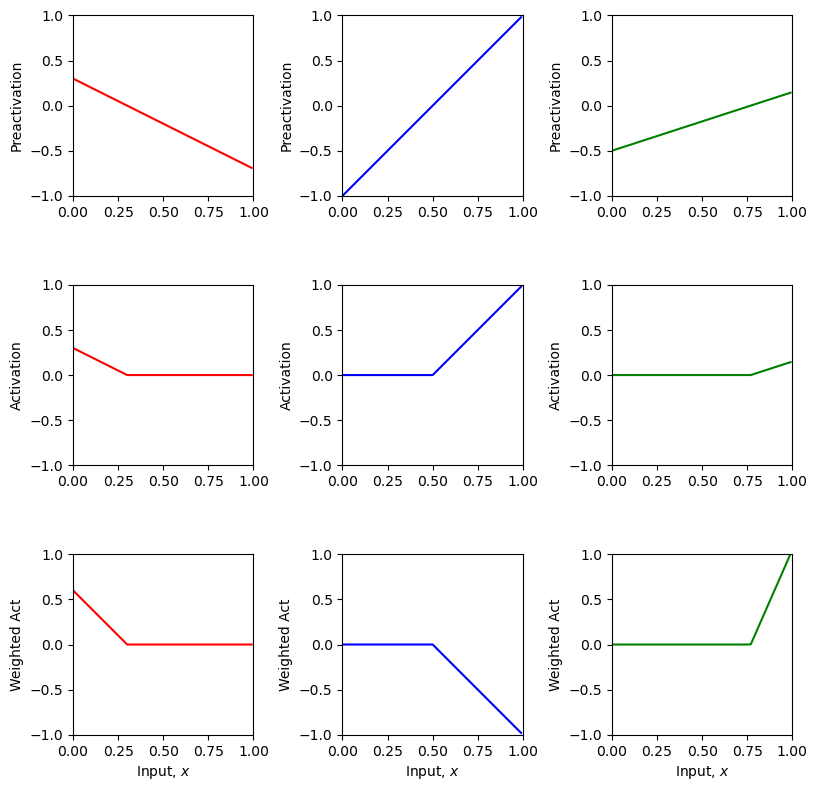

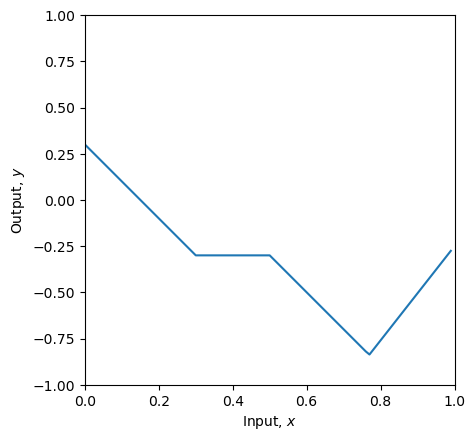

In [7]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

theta_1 = np.array([theta_11, theta_21, theta_31])
theta_0 = np.array([theta_10, theta_20, theta_30])
phi_vec = np.array([phi_1, phi_2, phi_3])

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre, act, w_act = \
    shallow_1_1_3(x, ReLU, phi_0,phi_vec, theta_1, theta_0)
# And then plot it
plot_neural(x, y, pre, act, w_act, plot_all=True)

Now let's play with the parameters to make sure we understand how they work.  The original  parameters were:

$\theta_{10} =  0.3$ ; $\theta_{20} = -1.0$<br>
$\theta_{20} =  -1.0$ ; $\theta_{21} = 2.0$<br>
$\theta_{30} =  -0.5$ ; $\theta_{31} = 0.65$<br>
$\phi_0 = -0.3; \phi_1 = 2.0; \phi_2 = -1.0; \phi_3 = 7.0$

In [8]:
# YOUR CODE HERE


# Different activation functions

The ReLU isn't the only kind of activation function.  For a long time, people used sigmoid functions.  A logistic sigmoid function is defined by the equation

\begin{equation}
f(h) = \frac{1}{1+\exp{(-10 z )}}
\end{equation}

(Note that the factor of 10 is not standard -- but it allow us to plot on the same axes as the ReLU examples)

In [9]:
# Define the sigmoid function
# (5 marks)
def sigmoid(preactivation):
  # TODO write code to implement the sigmoid function and compute the activation at the 
  # hidden unit from the preactivation.  Use the np.exp() function.
  # YOUR CODE HERE
  activation = 1./(1. + np.exp(-(10*preactivation)))
  return activation

<function matplotlib.pyplot.show(close=None, block=None)>

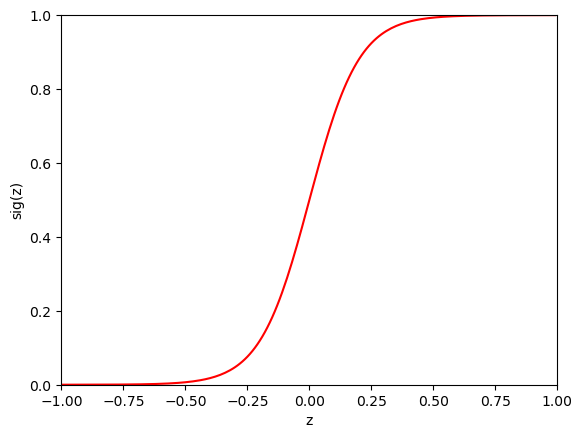

In [10]:
# Make an array of inputs
z = np.arange(-1,1,0.01)
sig_z = sigmoid(z)

# Plot the sigmoid function
fig, ax = plt.subplots()
ax.plot(z,sig_z,'r-')
ax.set_xlim([-1,1]);ax.set_ylim([0,1])
ax.set_xlabel('z'); ax.set_ylabel('sig(z)')
plt.show

Let's see what happens when we use this activation function in a neural network

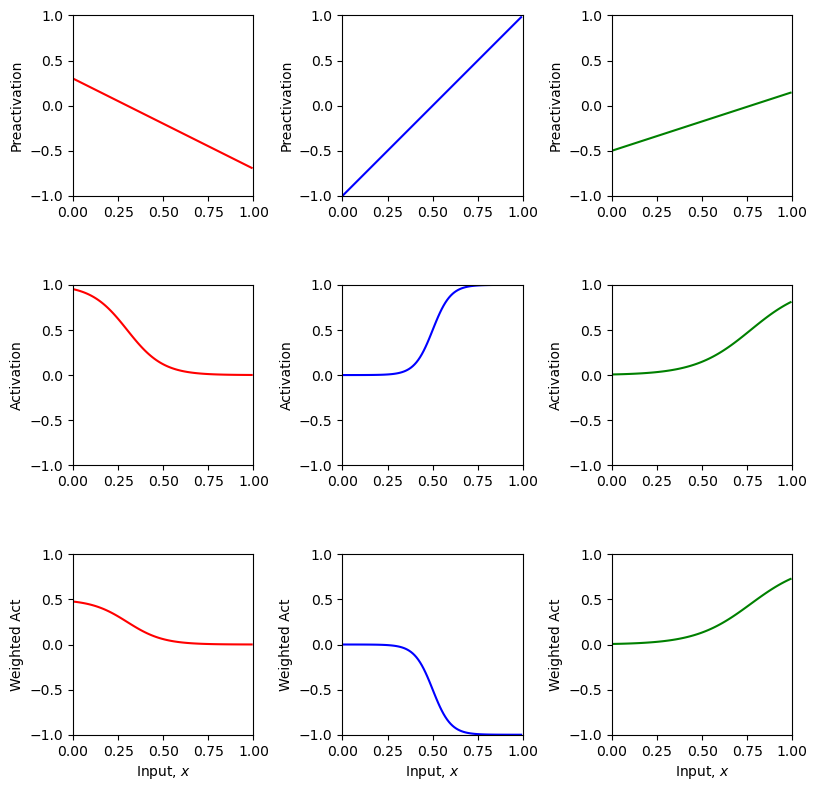

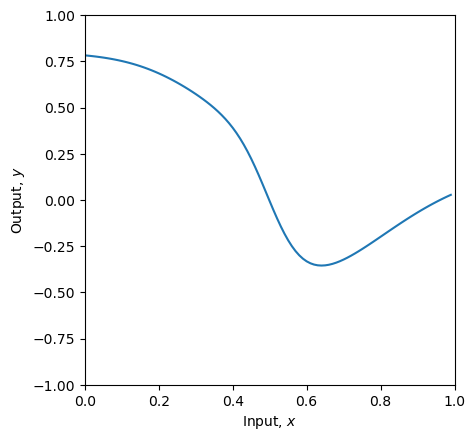

In [11]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

theta_1 = np.array([theta_11, theta_21, theta_31])
theta_0 = np.array([theta_10, theta_20, theta_30])
phi_vec = np.array([phi_1, phi_2, phi_3])

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre, act, w_act = \
    shallow_1_1_3(x, sigmoid, phi_0,phi_vec, theta_1, theta_0)
# And then plot it
plot_neural(x, y, pre, act, w_act, plot_all=True)

You probably notice that this gives nice smooth curves.  So why don't we use this?  Aha... it's not obvious right now, but we will get to it when we learn to fit models.

# Linear activation functions

However, neural networks don't work if the activation function is linear.  For example, consider what would happen if the activation function was: 

\begin{equation}
\mbox{lin}(z) = a + bz
\end{equation}

In [12]:
# Define the linear activation function
def lin(preactivation):
  a =0.5
  b =-0.4
  # Compute linear function
  activation = a+b * preactivation
  # Return
  return activation

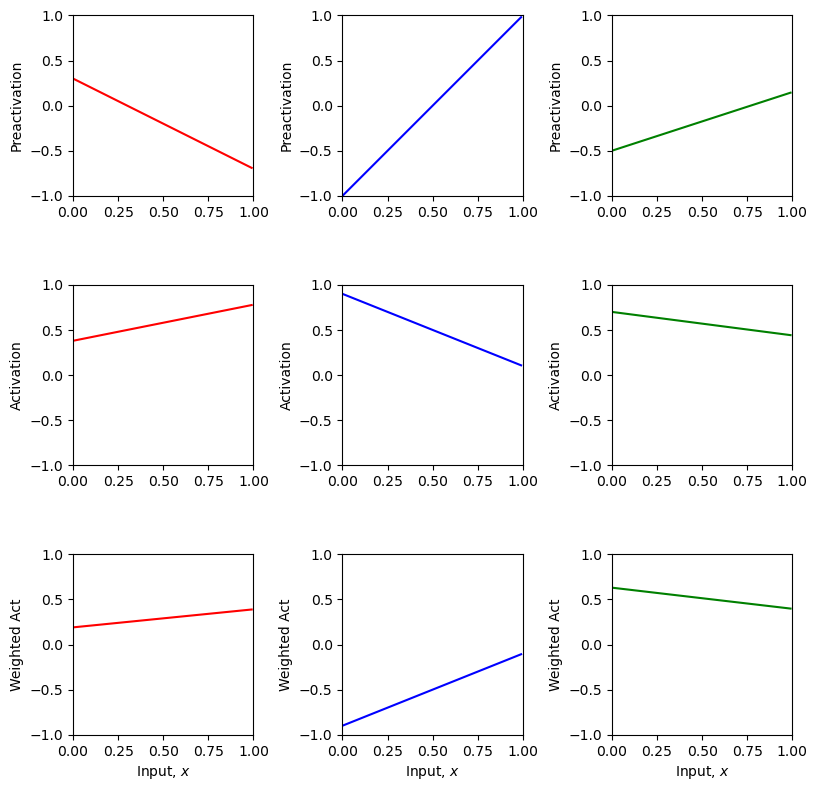

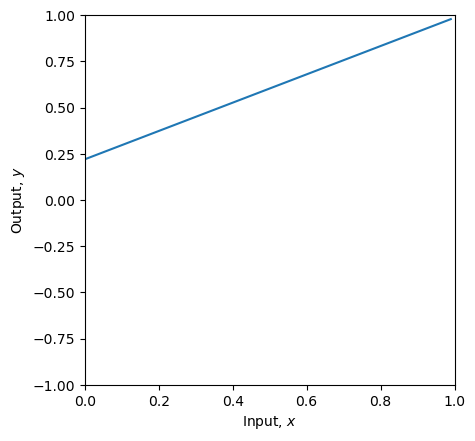

In [13]:
# TODO 
# 1. The linear activation function above just returns the input: (0+1*z) = z
# Before running the code Make a prediction about what the ten panels of the drawing will look like

# They will look like straight lines because the activation function is linear.

# Now run the code below to see if you were right. What family of functions can this represent?  
# (5 marks)

# I was right! This can only represent linear families of functions.

# 2. What happens if you change the parameters (a,b) to different values? 

# The graphs look different because the parameters are changed so the function they are using is a different shape

# Try a=0.5, b=-0.4 (don't forget) to run the cell again to update the function
# (5 marks)


theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

theta_1 = np.array([theta_11, theta_21, theta_31])
theta_0 = np.array([theta_10, theta_20, theta_30])
phi_vec = np.array([phi_1, phi_2, phi_3])

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre, act, w_act = \
    shallow_1_1_3(x, lin, phi_0,phi_vec, theta_1, theta_0)
# And then plot it
plot_neural(x, y, pre, act, w_act, plot_all=True)

# Least squares loss

Now let's consider fitting the network to data.  First we need to define the loss function.  We'll use the least squares loss:

\begin{equation}
L[\boldsymbol\phi] = \sum_{i=1}^{I}(y_{i}-\mbox{f}[x_{i},\boldsymbol\phi])^2
\end{equation}

where $(x_i,y_i)$ is an input/output training pair and $\mbox{f}[\bullet,\boldsymbol\phi]$ is the neural network with parameters $\boldsymbol\phi$.  The first term in the brackets is the ground truth output and the second term is the prediction of the model

In [14]:
# Least squares function
# (5 marks)
def least_squares_loss(y_train, y_predict):
  # TODO Replace the line below to use compute the sum of squared
  # differences between the real and predicted values of y
  # you will need to use the function np.sum
  
  loss = np.sum((y_train - y_predict)**2,axis=-1)
  return loss

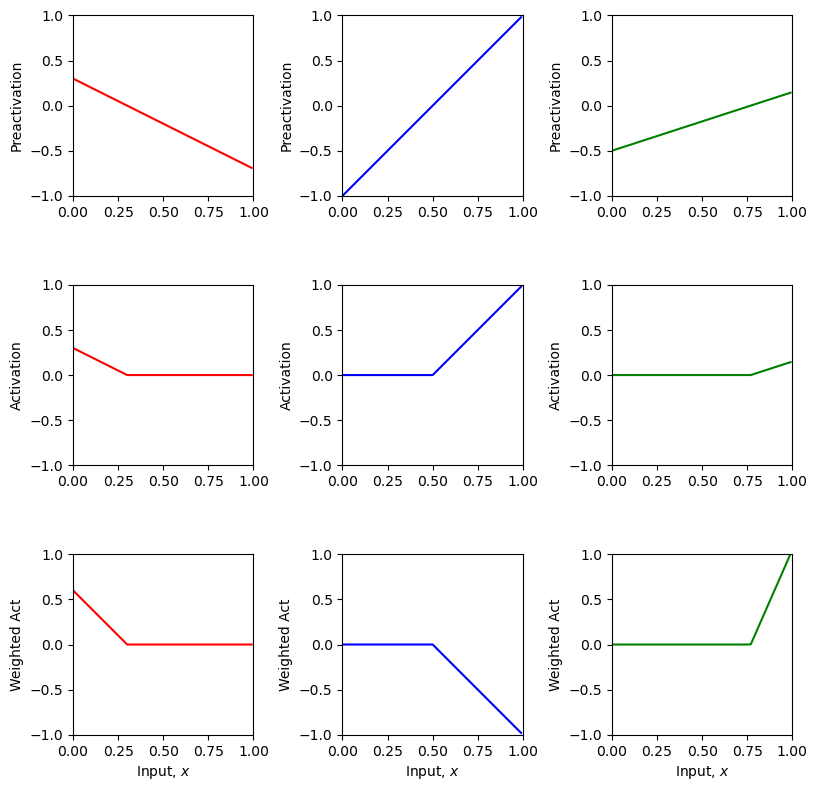

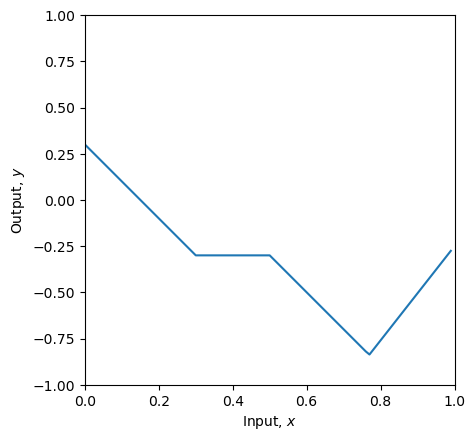

Loss = 9.385


In [15]:
# Now lets define some parameters, run the neural network, and compute the loss
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

theta_1 = np.array([theta_11, theta_21, theta_31])
theta_0 = np.array([theta_10, theta_20, theta_30])
phi_vec = np.array([phi_1, phi_2, phi_3])

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre, act, w_act = \
    shallow_1_1_3(x, ReLU, phi_0,phi_vec, theta_1, theta_0)
# And then plot it
plot_neural(x, y, pre, act, w_act, plot_all=True)

# Run the neural network on the training data
y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0,phi_vec, theta_1, theta_0)

# Compute the least squares loss and print it out
loss = least_squares_loss(y_train,y_predict)
print("Loss = %3.3f"%(loss))

# TODO.  Manipulate the parameters (by hand!) to make the function 
# fit the data better and try to reduct the loss to as small a number 
# as possible.  The best that I could do was 0.181
# Tip... start by manipulating phi_0.
# It's not that easy, so don't spend too much time on this!

# Networks with two inputs

There is a template below to build a neural network that takes two inputs similar to figure below

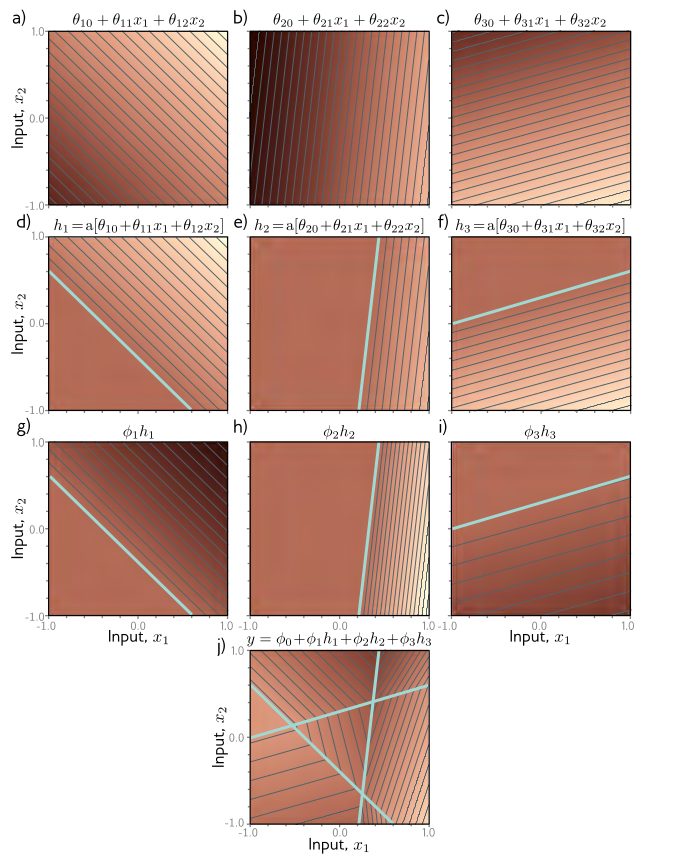

In [16]:
# Code to draw 2D function -- read it so you know what is going on, but you don't have to change it
def draw_2D_function(ax, x1_mesh, x2_mesh, y, draw_heatmap=False):
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    if draw_heatmap:
      fig.colorbar(pos, ax=ax)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')

# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3 
def plot_neural_2_inputs(xvec, y, pre, act, w_act, plot_all=False):
  x1 = xvec[..., 0]
  x2 = xvec[..., 1]
  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    draw_2D_function(ax[0,0], x1,x2,pre[..., 0]); ax[0,0].set_title('Preactivation')
    draw_2D_function(ax[0,1], x1,x2,pre[..., 1]); ax[0,1].set_title('Preactivation')
    draw_2D_function(ax[0,2], x1,x2,pre[..., 2]); ax[0,2].set_title('Preactivation')
    draw_2D_function(ax[1,0], x1,x2,act[..., 0]); ax[1,0].set_title('Activation')
    draw_2D_function(ax[1,1], x1,x2,act[..., 1]); ax[1,1].set_title('Activation')
    draw_2D_function(ax[1,2], x1,x2,act[..., 2]); ax[1,2].set_title('Activation')
    draw_2D_function(ax[2,0], x1,x2,w_act[..., 0]); ax[2,0].set_title('Weighted Act')
    draw_2D_function(ax[2,1], x1,x2,w_act[..., 1]); ax[2,1].set_title('Weighted Act')
    draw_2D_function(ax[2,2], x1,x2,w_act[..., 2]); ax[2,2].set_title('Weighted Act')
    plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y,draw_heatmap=True)
  ax.set_title('Network ouptut, $y$')
  ax.set_aspect(1.0)
  plt.show()

#### Define a shallow neural network with, two inputs, one output, and three hidden units
$\newcommand{\bfx}{\mathbf{x}}$
$$\bfx = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$$
$$\Theta_1 = \begin{bmatrix} \theta_{11} & \theta_{12} \\ \theta_{21} & \theta_{22} \\ \theta_{31} & \theta_{32}\end{bmatrix} $$
$$\Theta_0 = \begin{bmatrix} \theta_{10} \\ \theta_{20} \\ \theta_{30} \end{bmatrix} $$
$$\text{pre} = \Theta_0 + \Theta_1 \bfx$$
$$\text{act} = \text{activation_function}(\text{pre})$$
$$\Phi = \begin{bmatrix} \phi_{1} \\ \theta_{2} \\ \theta_{3} \end{bmatrix} $$
$$\text{w_act} = \Phi \odot \text{act}$$
$$ \text{y} = \phi_0 + \Phi^\top \text{act}$$

In [17]:
# Define a shallow neural network with, two inputs, one output, and three hidden units
# (20 marks)
def shallow_2_1_3(x, activation_fn, phi_0, phi_vec, theta_1, theta_0):
  """
  Inputs:
      x is a (m x n) grid of 2D vectors: a numpy array with shape (m, n, 2)
      activation_fn is numpy function that takes one input and returns one output example, ReLU
      phi_0 is a scalar
      phi_vec is a numpy array of shape (3,)  [phi_1, phi_2, phi_3]
      theta_1 is a numpy array of shape (3, 2)  
                   [[theta_11, theta_12],
                    [theta_21, theta_22],
                    [theta_31, theta_32]]
      theta_0 is a numpy array of shape (3,)  [theta_10, theta_20, theta_30]
  Returns:
      y, pre, act, w_act
      
      y is the scalar output of the neural network. 
          For input x of shape (m, n, 2), the output must be of size (m, n)
      
      pre stands for for pre-activation values. These are linear functions of x. pre should be a
          numpy array of shape  (m, n, 3), and each value should be computed from x and theta_1 and theta_0
      
      act stands for activation values. These archived by applying the activation function
          to the pre. 
        
      w_act stands for with weighted activation. Multiple act with phi_vec element-wise to 
          get numpy array of shape (m, n, 3).
  """
  # TODO Replace the lines below to compute the three initial linear functions 
  # (figure a-c) from the theta parameters.  These are the preactvations
  # pre = ??
  # print(x)
  pre = theta_0 + (theta_1 @ x[..., None]).squeeze()
  #pre = np.tensordot(x,theta_1,axes=[2,2])
  print(pre.shape)
  # Pass these through the ReLU function to compute the activations as in 
  # figure d-f
  act = activation_fn(pre)
  # TODO Replace the code below to weight the activations using phi1, phi2 and phi3
  # To create the equivalent of figure g-i
  # w_act = ??
  
  w_act = phi_vec * act
  # TODO Replace the code below to combing the weighted activations and add 
  # phi_0 to create the output as in figure j
  # y = ?
  y = phi_0 + w_act.sum(axis=-1)
  # Return everything we have calculated
  return y, pre, act, w_act

(101, 101, 3)


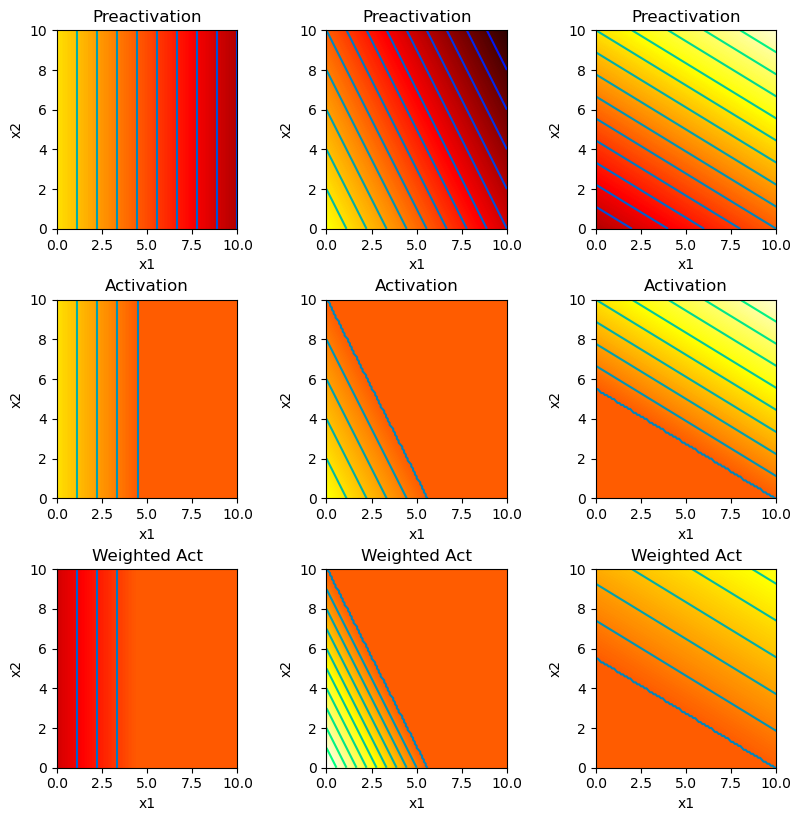

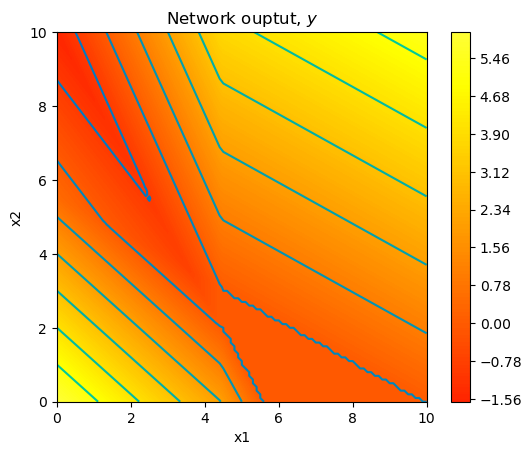

In [18]:
# Now lets define some parameters and run the neural network
theta_10 =  4.0 ;  theta_11 = -0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -5  ; theta_31 = 0.5; theta_32 = 0.9
phi_0 = 0.0; phi_1 = -1.0; phi_2 = 2.0; phi_3 = 0.6


theta_1 = np.array([[theta_11, theta_12],
                    [theta_21, theta_22],
                    [theta_31, theta_32]])
theta_0 = np.array([theta_10, theta_20, theta_30])
phi_vec = np.array([phi_1, phi_2, phi_3])

# https://numpy.org/doc/stable/reference/generated/numpy.mgrid.html
x1,x2 = np.mgrid[0:10:101j,
                 0:10:101j] 
xvec = np.stack((x1, x2), axis=-1)

# We run the neural network for each of these input values
y, pre, act, w_act = \
    shallow_2_1_3(xvec, ReLU, phi_0, phi_vec, theta_1, theta_0)
# And then plot it
plot_neural_2_inputs(xvec, y, pre, act, w_act, plot_all=True)



## Create a Multi Layer Perceptron (MLP) to classify digits 0 and 1 from MNIST dataset
(100 marks)

Create a 2-layer Multi Layer Perceptron (MLP) to classify digits 0 and 1 from MNIST dataset.

Use the same data and loss function as [Perceptron3.ipynb](https://colab.research.google.com/github/wecacuee/ECE490-Neural-Networks/blob/master/notebooks/02-linear-models/Perceptron3.ipynb) but use MLP model instead of Linear model.

You do not need to compute gradients by hand, you can use [AutogradNumpy.ipynb](https://colab.research.google.com/github/wecacuee/ECE490-Neural-Networks/blob/master//notebooks/03-autograd/AutogradNumpy.ipynb). The notebook has been converted into a module, [microtorch.py](https://vikasdhiman.info/ECE490-Neural-Networks/notebooks/05-mlp/microtorch.py) which can be imported. Another helper module will help you to keep track of all the parameters to update: [microtorch_nn.py](https://vikasdhiman.info/ECE490-Neural-Networks/notebooks/05-mlp/microtorch_nn.py). 

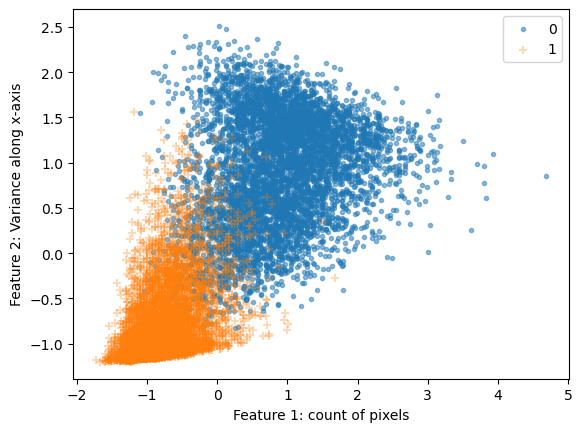

In [19]:
### Code to the get the data
! if [ ! -f zero_one_train_features.npz ]; then wget https://vikasdhiman.info/ECE490-Neural-Networks/notebooks/05-mlp/zero_one_train_features.npz; fi
def feature_n_pxls(imgs):
    n, *shape = imgs.shape
    return np.sum(imgs[:, :, :].reshape(n, -1) > 128, axis=1)

def feature_y_var(img):
    wts = img.mean(axis=0)
    mean = (np.arange(wts.shape[0]) * wts).sum() / np.sum(wts)
    var = ((np.arange(wts.shape[0]) - mean)**2 * wts).sum() / np.sum(wts)
    return var

zero_one_train_features = np.load('zero_one_train_features.npz')
FEATURE_MEAN = zero_one_train_features['mean']
FEATURE_STD = zero_one_train_features['std']
features = zero_one_train_features['normed_features']
labels = zero_one_train_features['labels']


def feature_extraction(imgs):
    features = np.stack((feature_n_pxls(imgs),
                     feature_y_var(imgs)), axis=-1)
    return (features - FEATURE_MEAN) / FEATURE_STD

def draw_features(ax, zero_features, one_features):
    zf = ax.scatter(zero_features[:, 0], zero_features[:, 1], marker='.', label='0', alpha=0.5)
    of = ax.scatter(one_features[:, 0], one_features[:, 1], marker='+', label='1', alpha=0.3)
    ax.legend()
    ax.set_xlabel('Feature 1: count of pixels')
    ax.set_ylabel('Feature 2: Variance along x-axis')
    return [zf, of] # return list of artists

fig, ax = plt.subplots()
draw_features(ax, features[labels > 0, :], features[labels < 0, :])


In [20]:
import numpy as np
def wget(url, filename):
    """
    Download files using requests package
    """
    try:
        import requests
    except ImportError:
        import subprocess
        subprocess.call("pip install --user requests".split())
        import requests
    r = requests.get(url)
    with open(filename, 'wb') as fd:
        for chunk in r.iter_content():
            fd.write(chunk)
    
try:
    import microtorch as t
except ImportError:
    wget('https://vikasdhiman.info/ECE490-Neural-Networks/notebooks/05-mlp/microtorch.py',
         'microtorch.py')
    import microtorch as t
    
try:
    import microtorch_nn as tnn
except ImportError:
    wget('https://vikasdhiman.info/ECE490-Neural-Networks/notebooks/05-mlp/microtorch_nn.py',
         'microtorch_nn.py')
    import microtorch_nn as tnn

def loss(predicted_labels, true_labels):
    
    #print(predicted_labels)
    #print(true_labels)
    #print(true_labels.shape[0])
    return tnn.thresholded_l1_loss(predicted_labels, true_labels[..., None]).sum()
    #return tnn.mse_loss(predicted_labels,true_labels)

# TODO:
# Define model = ?
# YOUR CODE HERE
model = tnn.Sequential(
    tnn.Linear(2,5),
    tnn.ReLU(),
    tnn.Linear(5,1)
)



def train_by_gradient_descent(model, loss, train_features, train_labels, lr=0.000001):
    train_features_tensor = t.Tensor(train_features)
    predicted_labels = model(train_features_tensor)
    #print(predicted_labels)
    
    loss_t = loss(predicted_labels, train_labels)
    loss_t.backward(1)
    loss_t_minus_1 = 2*loss_t.value  # Fake  value to make the while test pass once
    niter = 0
    while np.abs(loss_t.value - loss_t_minus_1) / loss_t.value > 0.01: # Stopping criterion
        for param in model.parameters():
            assert param.grad is not None
            #print("before:", id(param))
            param.value = param.value - lr * param.grad  # Gradient descent
            #print("after:", id(param))

        # Recompute the gradients
        predicted_labels = model(train_features_tensor)
        loss_t_minus_1 = loss_t.value.copy()
        loss_t = loss(predicted_labels, train_labels)
        print("lr:", lr, "loss:", loss_t.value, "delta loss: ", loss_t.value - loss_t_minus_1)
        #fig, ax = plt.subplots(1,1)
        #draw_features(ax, train_features[predicted_labels.value.flatten() > 0, :], features[predicted_labels.value.flatten() < 0, :])
        loss_t.backward(1)
        
        niter += 1
        if loss_t.value > loss_t_minus_1:
            lr = lr / 2
    return model

trained_model = train_by_gradient_descent(model, loss, features, labels)

# Use the trained model on test dataset and compute the test accuracy
# YOUR CODE HERE


lr: 1e-06 loss: 7652.078298050041 delta loss:  -165.16901847395366
lr: 1e-06 loss: 7325.412474005321 delta loss:  -326.66582404471956
lr: 1e-06 loss: 6844.401331915382 delta loss:  -481.0111420899393
lr: 1e-06 loss: 6219.295841014355 delta loss:  -625.1054909010272
lr: 1e-06 loss: 5462.8893394684565 delta loss:  -756.4065015458982
lr: 1e-06 loss: 4589.804169652096 delta loss:  -873.0851698163606
lr: 1e-06 loss: 3615.637728893387 delta loss:  -974.1664407587091
lr: 1e-06 loss: 2576.648078361043 delta loss:  -1038.9896505323436
lr: 1e-06 loss: 1728.1806018387965 delta loss:  -848.4674765222467
lr: 1e-06 loss: 1059.2393171196113 delta loss:  -668.9412847191852
lr: 1e-06 loss: 444.19876971674455 delta loss:  -615.0405474028668
lr: 1e-06 loss: 205.46082978366752 delta loss:  -238.73793993307703
lr: 1e-06 loss: 168.27514573444842 delta loss:  -37.185684049219105
lr: 1e-06 loss: 168.89148662808296 delta loss:  0.6163408936345434


NotImplementedError: 

In [21]:
# Load MNIST dataset from uint8 byte files
import struct
import numpy as np

# Ref:https://github.com/sorki/python-mnist/blob/master/mnist/loader.py
def mnist_read_labels(fname='data/train-labels-idx1-ubyte'):
    with open(fname, 'rb') as file:
        # The file starts with 4 byte 2 unsigned ints 
        magic, size = struct.unpack('>II', file.read(8))
        assert magic == 2049
        labels = np.frombuffer(file.read(), dtype='u1')
        return labels
    
# Ref:https://github.com/sorki/python-mnist/blob/master/mnist/loader.py
def mnist_read_images(fname='data/train-images-idx3-ubyte'):
    with open(fname, 'rb') as file:
        # The file starts with 4 byte 4 unsigned ints 
        magic, size, rows, cols = struct.unpack('>IIII', file.read(16))
        assert magic == 2051
        image_data = np.frombuffer(file.read(), dtype='u1')
        images = image_data.reshape(size, rows, cols)
        return images
test_images = mnist_read_images('data/t10k-images-idx3-ubyte')
test_labels = mnist_read_labels('data/t10k-labels-idx1-ubyte')
zero_one_filter = (test_labels == 0) | (test_labels == 1)
zero_one_test_images = test_images[zero_one_filter, ...]
zero_one_test_labels = test_labels[zero_one_filter, ...]


def returnclasslabel(test_imgs):
    Xtest = feature_extraction(test_imgs)
    return np.where(
        trained_model(Xtest).value.ravel() > 0, 
        0,
        1)
zero_one_predicted_labels = returnclasslabel(zero_one_test_images)

# Find test_accuracy = ? 
# YOUR CODE HERE
raise NotImplementedError()
print(test_accuracy)
assert test_accuracy > 0.90

FileNotFoundError: [Errno 2] No such file or directory: 'data/t10k-images-idx3-ubyte'